In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
df  = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [384]:
df.shape

(5572, 5)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [386]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [387]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [388]:
df.shape

(5572, 2)

In [389]:
df.sample(5)

,v1,v2
3606,ham,I have no idea where you are
2945,ham,make that 3! 4 fucks sake?! x
2324,ham,Ok lor.
2361,ham,Hi. I'm sorry i missed your call. Can you pls ...
1621,ham,Living is very simple.. Loving is also simple....


In [390]:
#ranaming the columns
df.rename(columns = {'v1':'label','v2':'text'},inplace=True)

In [391]:
df.sample(5)

,label,text
526,spam,Today's Offer! Claim ur å£150 worth of discoun...
3447,ham,Its &lt;#&gt; k here oh. Should i send home f...
2123,spam,+123 Congratulations - in this week's competit...
824,ham,Have a good evening! Ttyl
5445,ham,"And that's fine, I got enough bud to last most..."


In [392]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [393]:
df['label'] = encoder.fit_transform(df['label'])

In [394]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [395]:
df.duplicated().sum()

403

In [396]:
df.drop_duplicates(inplace=True,keep='first')

In [397]:
df.shape

(5169, 2)

In [398]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1c48000b3b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

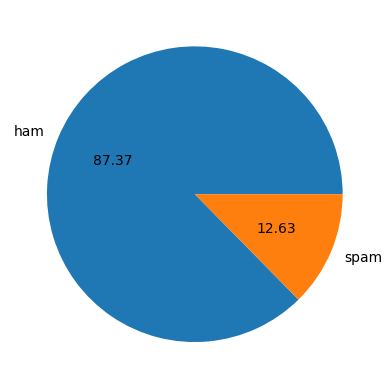

In [399]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

Data is imbalanced

In [400]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [401]:
df['alpha_nums'] = df['text'].apply(len)

In [402]:
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [403]:
df.head(3)

,label,text,alpha_nums,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [404]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [405]:
df.head()

,label,text,alpha_nums,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [406]:
df[['alpha_nums','words','sentences']].describe()

,alpha_nums,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [407]:
# ham
df[df['label']==0][['alpha_nums','words','sentences']].describe()

,alpha_nums,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [408]:
# spam
df[df['label']==1][['alpha_nums','words','sentences']].describe()

,alpha_nums,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


spam messages are comparitively longer.

In [409]:
df.sample(5)

,label,text,alpha_nums,words,sentences
2243,0,Boo I'm on my way to my moms. She's making tor...,64,17,3
2507,0,Yup...,6,2,1
3342,0,"I haven't forgotten you, i might have a couple...",91,23,2
4600,1,FreeMsg: Txt: CALL to No: 86888 & claim your r...,144,32,2
4576,1,Had your contract mobile 11 Mnths? Latest Moto...,159,34,5


<Axes: xlabel='alpha_nums', ylabel='Count'>

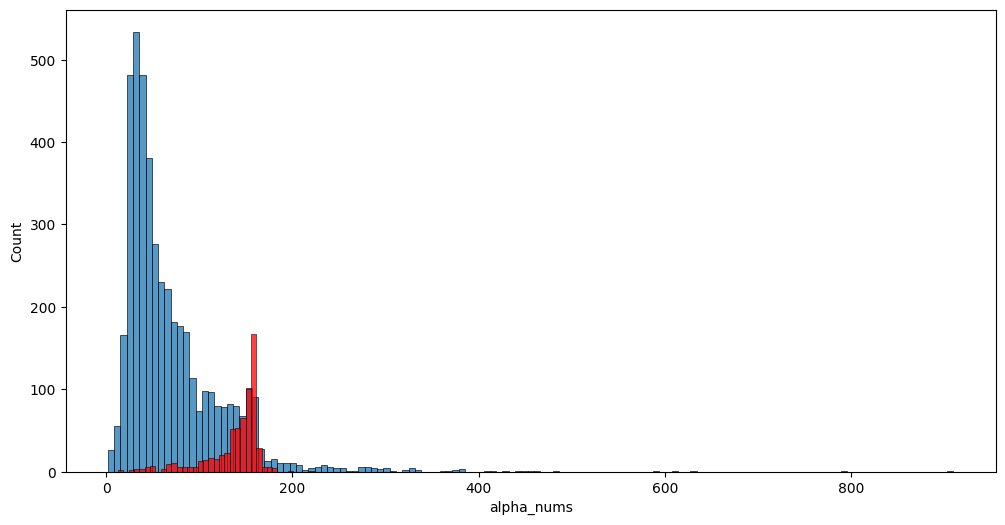

In [410]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['alpha_nums'])
sns.histplot(df[df['label']==1]['alpha_nums'],color='red')

<Axes: xlabel='words', ylabel='Count'>

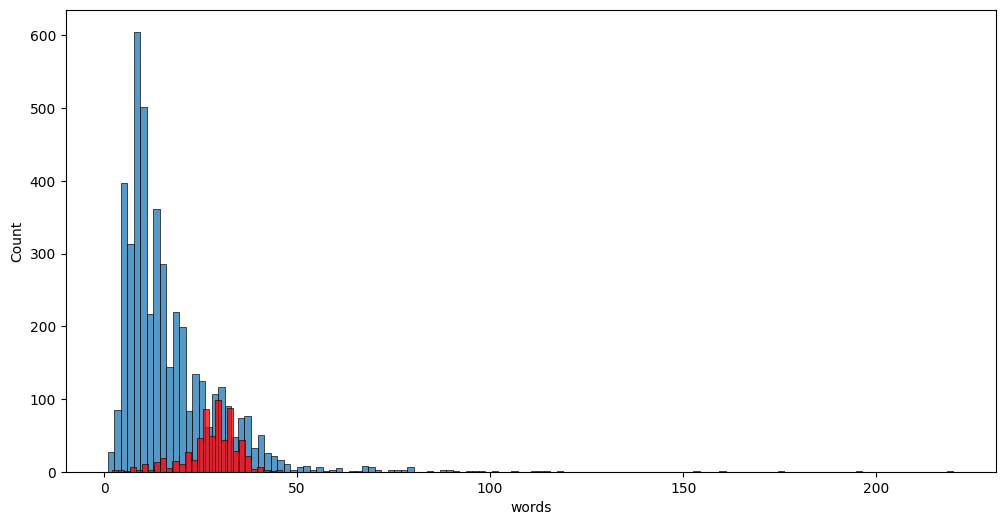

In [411]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['words'])
sns.histplot(df[df['label']==1]['words'],color='red')

<Axes: xlabel='sentences', ylabel='Count'>

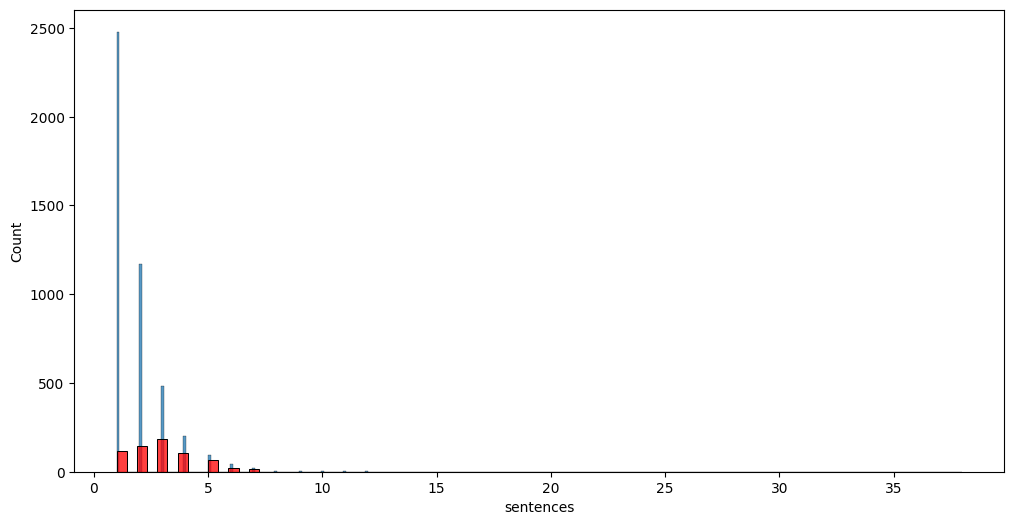

In [412]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['sentences'])
sns.histplot(df[df['label']==1]['sentences'],color='red')

<Axes: >

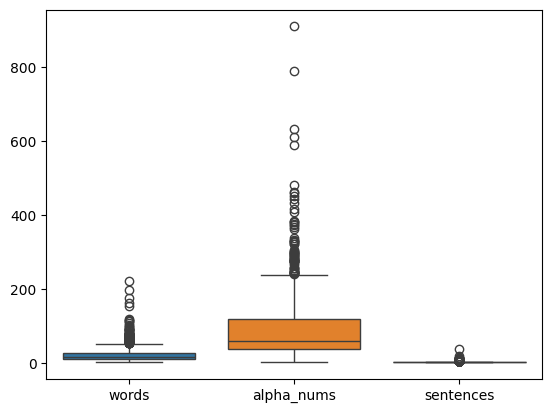

In [413]:
sns.boxplot([df['words'],df['alpha_nums'],df['sentences']])

In [414]:
df.head(3)

,label,text,alpha_nums,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


<Axes: >

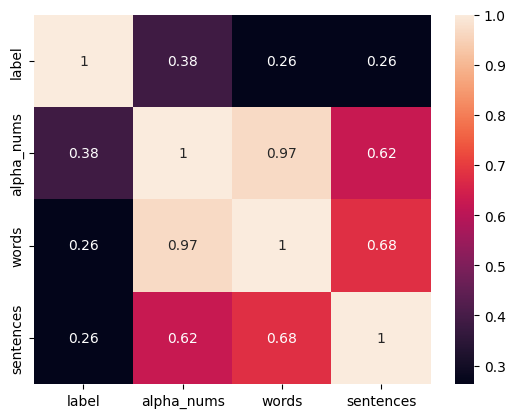

In [415]:
sns.heatmap(df[['label','alpha_nums','words','sentences']].corr(),annot=True)

conclusion
-  we will keep alpha_nums and will delete ['words','sentences'] because label is highly co-related with then alpha_nums column

#### Data preprocessing
- lower case
- tokenization
- remove special characters
- remove stop words
- stemming

In [416]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [417]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [418]:
df['transformed_text'] =  df['text'].apply(transform_text)

In [419]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [420]:
spam_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

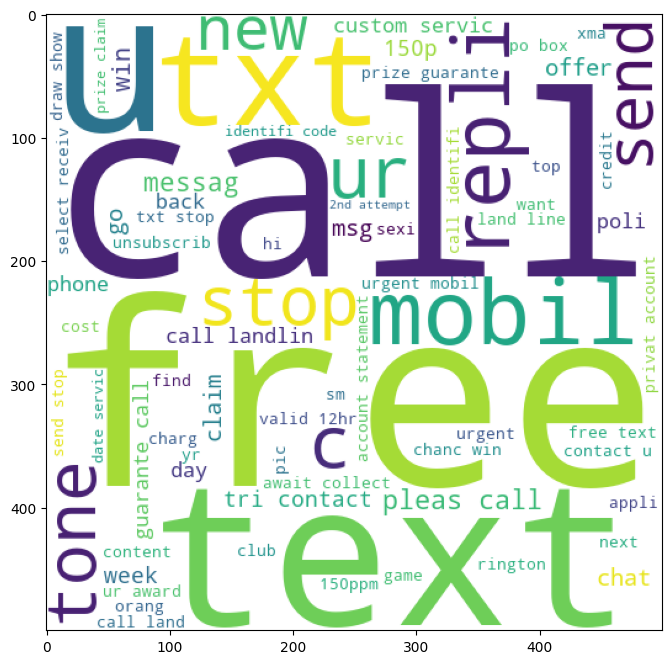

In [421]:
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

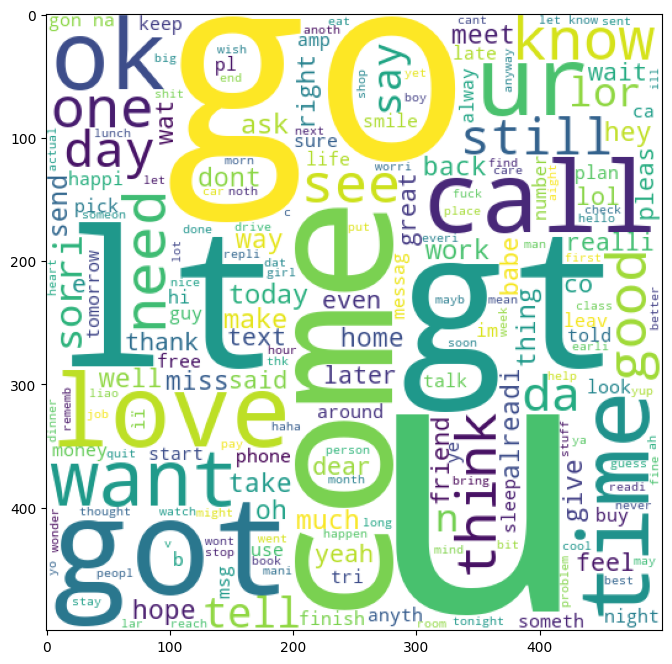

In [422]:
ham_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

In [423]:
spam_words = []
for i in df[df['label']==1]['transformed_text'].tolist():
    for j in i.split():
        spam_words.append(j)


In [424]:
len(spam_words)

9939

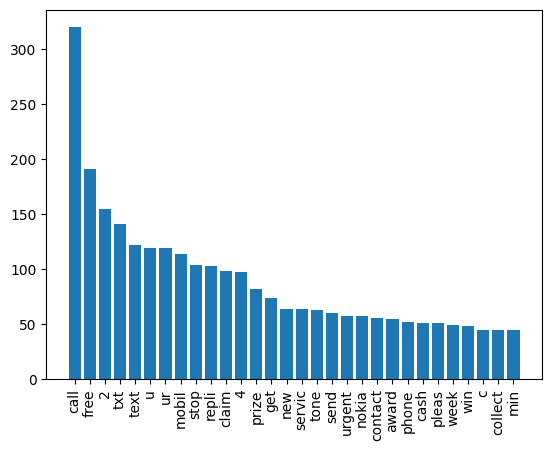

In [425]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [426]:
ham_words = []
for i in df[df['label']==0]['transformed_text'].tolist():
    for j in i.split():
        ham_words.append(j)

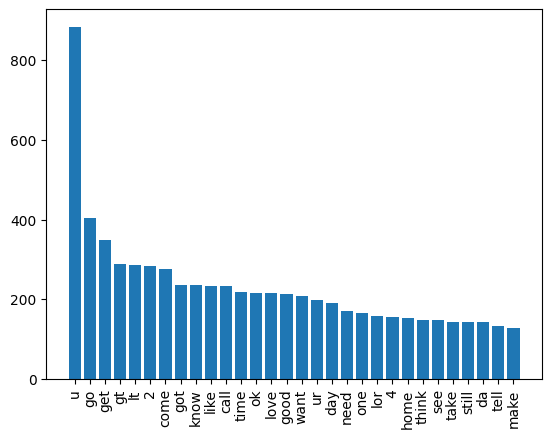

In [427]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

model building

In [428]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [429]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [430]:
X.shape

(5169, 3000)

In [431]:
y = df['label'].values

In [432]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [433]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [434]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [435]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [436]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [437]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [438]:
## tfidf and then mnb

In [441]:
import pickle 
pickle.dump(tf,open('vector.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))